# 1. Importing necessary libraries

In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import openpyxl
# data profiling EDA 
from ydata_profiling import ProfileReport 
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Reading dataset

In [2]:
data = pd.read_csv("/kaggle/input/economic-indicatoors-dataset/economic_indicators_dataset_2010_2023.csv")
df = pd.DataFrame(data)

# 3. Data Overview & EDA using ProfileReport

In [3]:
# checking data from top 5 rows
df.head(5)

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


In [4]:
# checking data from tail 5 rows
df.tail(5)

,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
495,2023-08-31,Japan,5.71,-3.85,4.69,8.50,5968.07
496,2023-08-31,UK,4.82,8.95,10.91,8.87,21731.52
497,2023-09-30,USA,7.32,0.61,9.36,4.58,38924.38
498,2023-10-31,Germany,8.04,-2.23,2.89,8.04,39107.07
499,2023-11-30,Australia,9.23,6.16,6.78,9.49,21072.66


In [5]:
profile = ProfileReport(df,title="Profiling data analysis",html={'style':{'full_width':True}})
profile.to_file("before_clean_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4. Checking data types

In [6]:
df.dtypes

Date                      object
Country                   object
Inflation Rate (%)       float64
GDP Growth Rate (%)      float64
Unemployment Rate (%)    float64
Interest Rate (%)        float64
Stock Index Value        float64
dtype: object

# 5. Dropping the duplicate rows

In [7]:
df.duplicated().sum()

0

There are no any duplicated data

In [8]:
df.shape

(500, 7)

In [9]:
df.count()

Date                     500
Country                  500
Inflation Rate (%)       500
GDP Growth Rate (%)      500
Unemployment Rate (%)    500
Interest Rate (%)        500
Stock Index Value        500
dtype: int64

# 6. Dropping the missing or null values.

In [10]:
# checking null
df.isnull().sum()

Date                     0
Country                  0
Inflation Rate (%)       0
GDP Growth Rate (%)      0
Unemployment Rate (%)    0
Interest Rate (%)        0
Stock Index Value        0
dtype: int64

There are no null values

In [11]:
df.shape

(500, 7)

In [12]:
df.count()

Date                     500
Country                  500
Inflation Rate (%)       500
GDP Growth Rate (%)      500
Unemployment Rate (%)    500
Interest Rate (%)        500
Stock Index Value        500
dtype: int64

# 7. Detecting Outliers
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique.

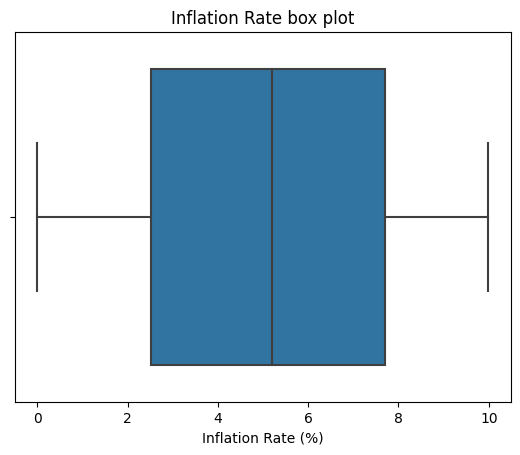

In [13]:
sns.boxplot(x=df['Inflation Rate (%)'])
plt.title("Inflation Rate box plot")
plt.show()

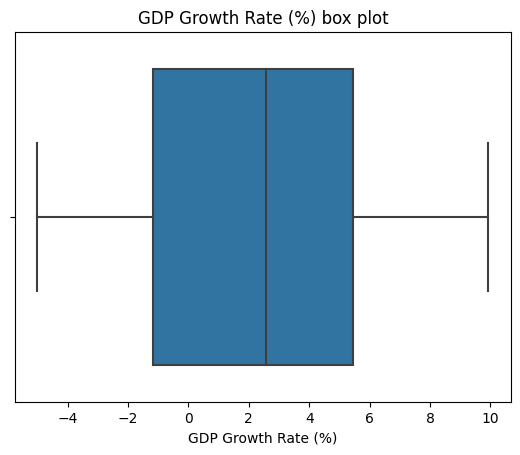

In [14]:
sns.boxplot(x=df['GDP Growth Rate (%)'])
plt.title("GDP Growth Rate (%) box plot")
plt.show()

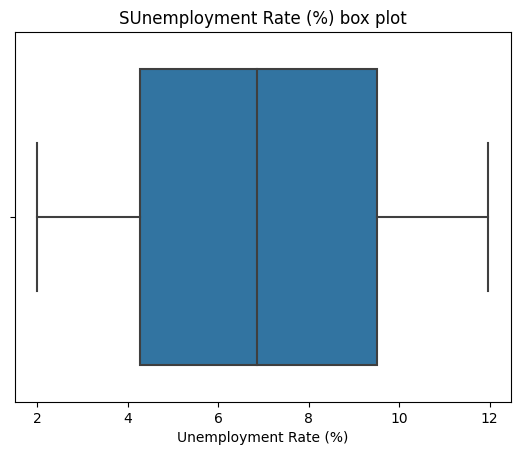

In [15]:
sns.boxplot(x=df['Unemployment Rate (%)']) # boxplot of price
plt.title("SUnemployment Rate (%) box plot")
plt.show()

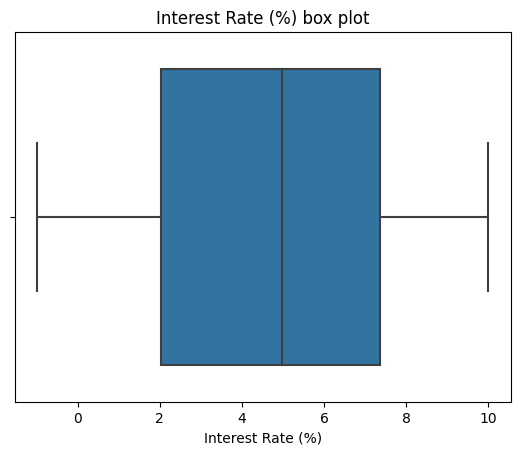

In [16]:
sns.boxplot(x=df['Interest Rate (%)']) # boxplot of price
plt.title("Interest Rate (%) box plot")
plt.show()

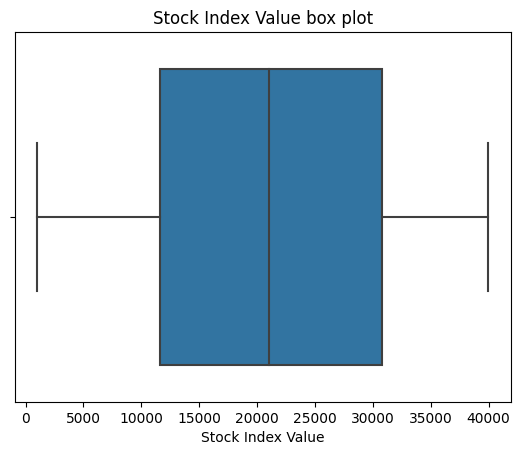

In [17]:
sns.boxplot(x=df['Stock Index Value']) # boxplot of price
plt.title("Stock Index Value box plot")
plt.show()

In [18]:
df.dtypes

Date                      object
Country                   object
Inflation Rate (%)       float64
GDP Growth Rate (%)      float64
Unemployment Rate (%)    float64
Interest Rate (%)        float64
Stock Index Value        float64
dtype: object

In [19]:
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Inflation Rate (%)           5.185
GDP Growth Rate (%)          6.615
Unemployment Rate (%)        5.245
Interest Rate (%)            5.325
Stock Index Value        19236.985
dtype: float64


In [20]:
# Identify and filter out outliers for each numeric column
outliers_condition = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))
df_filtered = numeric_df[~outliers_condition.any(axis=1)]

# Print the shape of the DataFrame after removing outliers
print(df_filtered.shape)

(500, 5)


# 8. Plot different features against one another (scatter), against frequency (histogram)

         Date Country  Inflation Rate (%)  GDP Growth Rate (%)  \
0  2010-01-31  Brazil                1.23                 0.69   
1  2010-01-31  France                6.76                 2.59   
2  2010-01-31     USA                7.46                 4.84   

   Unemployment Rate (%)  Interest Rate (%)  Stock Index Value  
0                  10.48               7.71           21748.85  
1                   4.27               7.39           10039.56  
2                   2.64               6.39           13129.10  


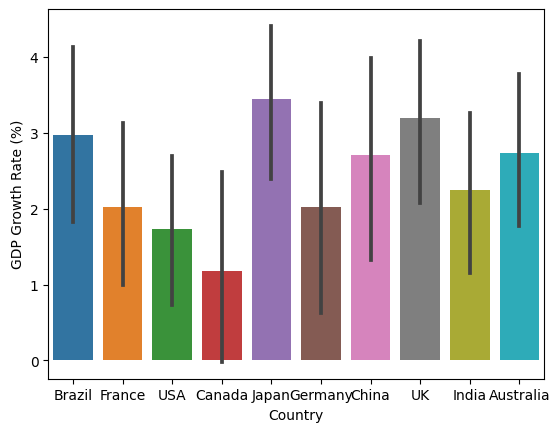

In [21]:
print(df.head(3))

sns.barplot(data=df, x = "Country",y="GDP Growth Rate (%)")
plt.show()

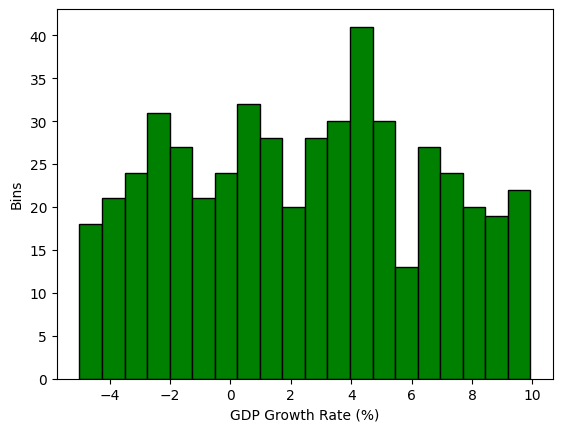

In [22]:
# print(df.head(4))
plt.hist(df["GDP Growth Rate (%)"],bins = 20,color="green",edgecolor = "black")
# plt.xlabel("Salary")
plt.xlabel("GDP Growth Rate (%)")
plt.ylabel("Bins")
plt.show()

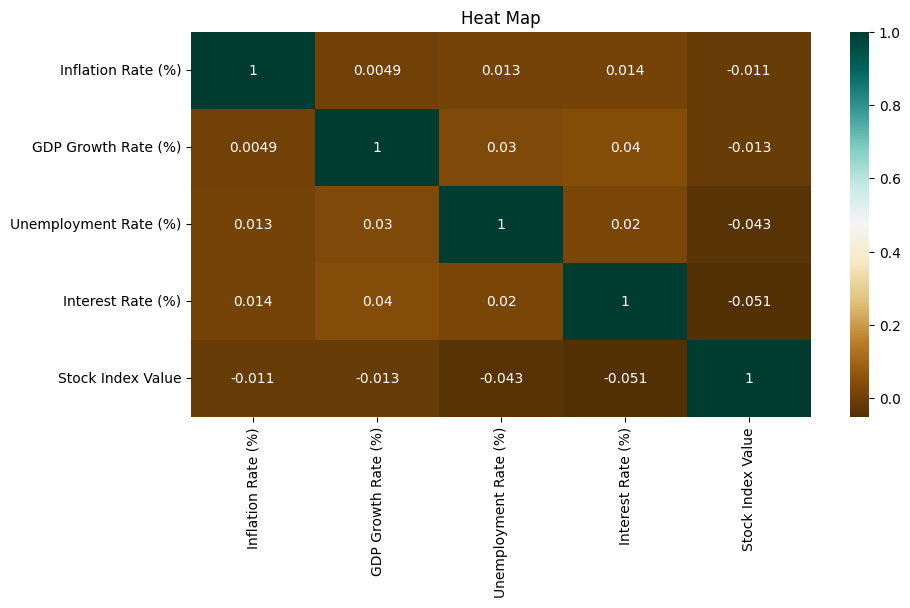

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
c = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.title("Heat Map")
plt.show()

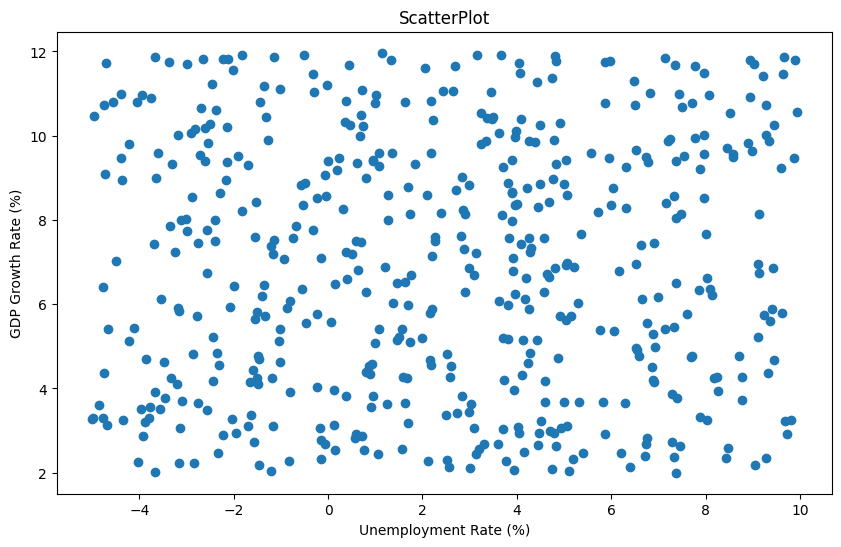

In [24]:
df.head(4)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['GDP Growth Rate (%)'], df['Unemployment Rate (%)'])
ax.set_xlabel('Unemployment Rate (%)')
ax.set_ylabel('GDP Growth Rate (%)')
plt.title("ScatterPlot")
plt.show()

# 9. Save the Processed Data

In [25]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/kaggle/working/cleaned_car_dataset.csv', index=False)

# 10. Data profiling after cleaning data

In [26]:
profile = ProfileReport(df, title="Profiling Report",html= {'style':{'full_width':True}})
profile.to_file("after_cleaning.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]